This notebook produces the figures to demonstrate our four SNe distribution models.

Model 1: SNe are randomly placed within the galaxy map (PHANGS--ALMA footprint).  
Model 2: SNe follow the gas distribution within the galaxy (PHANGS--ALMA).  
Model 3: SNe follow the stellar profile of the galaxy (IRAC/WISE infrared 3.6 microns).  
Model 4: SNe are split between Models 2 & 3 with ~70% CCSNe following the gas distribution and the reminaing following the stellar profile.  

In [1]:
#import packages and initialize settings
#!pip install aplpy
import aplpy
import pandas as pd
import os
import numpy as np
from astropy.io import fits
import astropy.io.fits as pyfits
from astropy.wcs import WCS
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table
from astropy.io import ascii
from reproject import reproject_interp

# plt.rc('text',usetex=True)
# fontsize=20
# plt.rc('xtick',labelsize=fontsize)
# plt.rc('ytick',labelsize=fontsize)
# plt.rcParams['axes.facecolor']='white'
# plt.rcParams['savefig.facecolor']="white"

import sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
from deprojectGalaxy import deproject
from FindNearestMC import int2mass, mass2int, findNearest, angDistToPc
from SNeGenerationModels import runModels

i = 2

In [2]:
database = Table.read('../Data/3.SNe+GalData.csv', format = "csv")
database[0:1]
covFile = database["PACovFile"][i]
ifrFile = database["IFRFile"][i]
hdu_cov = pyfits.open(covFile)
hdu_ifr = pyfits.open(ifrFile)
covMap  = hdu_cov[0].data
ifrMap, footprint = reproject_interp(hdu_ifr, hdu_cov[0].header)

#wcs     = WCS(hdu_ifr[0].header, naxis=2)
wcs     = WCS(hdu_cov[0].header, naxis=2)
naxis   = wcs._naxis # size of image naxis[0] = x and [1] = y
grid    = np.indices((naxis[1],naxis[0]))
ra, dec = wcs.wcs_pix2world(grid[1],grid[0],0) 

f_cov = covMap.flatten()
f_ifr = ifrMap.flatten()  
f_ra  = ra.flatten()
f_dec = dec.flatten()

keep = np.where((f_cov > 0.9) & np.isfinite(f_ifr))
ifr  = f_ifr[keep]
star_ra   = f_ra[keep]
star_dec  = f_dec[keep]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [3]:

centerCoords = [(database["orient_ra"][i], database["orient_dec"][i]) for i in range(len(database))]    

i = 2
xArr1, yArr1 = runModels(database["galaxy"][i],database["ImageFile150"][i],centerCoords[i],database["orient_posang"][i],database["orient_incl"][i],database["dist"][i], modelType=1)
xArr2, yArr2 = runModels(database["galaxy"][i],database["ImageFile150"][i],centerCoords[i],database["orient_posang"][i],database["orient_incl"][i],database["dist"][i], modelType=2)
xArr3, yArr3 = runModels(database["galaxy"][i],"/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/irac/" + database["galaxy"][i] + "_irac1_gauss7p5.fits",centerCoords[i],database["orient_posang"][i],database["orient_incl"][i],database["dist"][i], modelType=3,starLight = ifr, starRa = star_ra, starDec = star_dec)



INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


<ipython-input-4-e0709fcb9686>:8: RuntimeWarning: invalid value encountered in log10
  ifr_log_Map = np.log10(ifrMap)


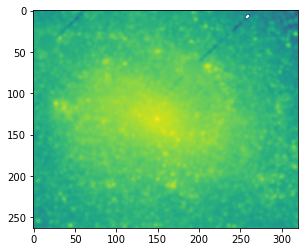

In [4]:

# File names
PA_Img = database["ImageFile150"][i]

hdu_co = fits.open(PA_Img)
co_map = hdu_co[0].data
co_hdr = hdu_co[0].header

ifr_log_Map = np.log10(ifrMap)
plt.imshow(ifr_log_Map)
#plt.scatter(xArr3, yArr3)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


INFO: Auto-setting vmax to  8.356e-01 [aplpy.core]


/home/mayker.1/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)


INFO: Auto-setting vmax to  8.616e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.386e-01 [aplpy.core]


/home/mayker.1/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)
/home/mayker.1/anaconda3/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)


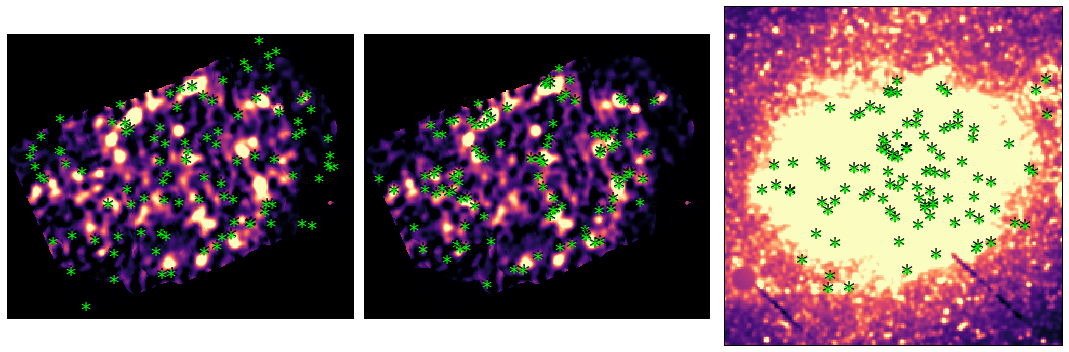

In [5]:


fig = plt.figure(figsize=(15, 5), facecolor = 'white')

f1 = aplpy.FITSFigure(PA_Img, figure=fig, subplot=(1,3,1))
f1.tick_labels.hide()
f1.ticks.hide()
f1.axis_labels.hide()

f2 = aplpy.FITSFigure(PA_Img, figure=fig,  subplot=(1,3,2))
f2.tick_labels.hide()
f2.ticks.hide()
f2.axis_labels.hide()

f3 = aplpy.FITSFigure(ifrFile, stretch="log", figure=fig,  subplot=(1,3,3))
f3.recenter(centerCoords[i][0], centerCoords[i][1],width = 1/6, height = 1/6)
f3.tick_labels.hide()
f3.ticks.hide()
f3.axis_labels.hide()

f1.show_colorscale(vmin=0, pmax=95, cmap='magma', stretch='linear')
f1.set_nan_color('black')

f2.show_colorscale(vmin=0, pmax=95, cmap='magma', stretch='linear')
f2.set_nan_color('black')

f3.show_colorscale(vmin=0, pmax=95, cmap='magma', stretch='linear')
f3.set_nan_color('black')

fig.tight_layout()
#x,y = fig.pixel2world(xArr, yArr)

for i in range(len(xArr1)):
    f1.add_label(float(xArr1[i]), float(yArr1[i]), text='*', color='black', fontsize = 24)
    f1.add_label(float(xArr1[i]), float(yArr1[i]), text='*', color='lime', fontsize = 20)
    
for i in range(len(xArr2)):
    f2.add_label(float(xArr2[i]), float(yArr2[i]), text='*', color='black', fontsize = 24)
    f2.add_label(float(xArr2[i]), float(yArr2[i]), text='*', color="lime", fontsize = 20)
    
for i in range(len(xArr3)):
    f3.add_label(float(xArr3[i]), float(yArr3[i]), text='*', color='black', fontsize = 24)
    f3.add_label(float(xArr3[i]), float(yArr3[i]), text='*', color="lime", fontsize = 20)

In [6]:
print(len(xArr1))

100


In [7]:
print(xArr1, yArr2)
print(xArr2, yArr2)
print(xArr3, yArr3)

[13.69846137 13.74828903 13.63665617 13.65702126 13.65357895 13.68933064
 13.80446472 13.67461847 13.65778179 13.66757531 13.72443235 13.63742163
 13.66689107 13.61985583 13.70337073 13.67811357 13.70828809 13.77149432
 13.65632604 13.61562618 13.7272469  13.76021722 13.75886521 13.80654233
 13.7476062  13.7293448  13.65918866 13.72654109 13.71249812 13.67880478
 13.6605363  13.79461942 13.65144915 13.72865149 13.79389902 13.79321625
 13.65987814 13.75041073 13.65983681 13.62544669 13.71671129 13.7279539
 13.7005583  13.68300196 13.71600556 13.64091245 13.79041576 13.78624042
 13.6921303  13.74129262 13.75529935 13.72232022 13.72514021 13.63670377
 13.7988858  13.65493951 13.6808978  13.73146308 13.75885667 13.81357433
 13.66480498 13.66966166 13.68722231 13.63321469 13.69495642 13.68160474
 13.61843406 13.64229693 13.6703636  13.78696198 13.72934051 13.75109707
 13.81146333 13.67181085 13.73285116 13.72163135 13.61983938 13.63033475
 13.77988943 13.75179646 13.8072707  13.63951581 13.

In [8]:
print(database["galaxy"])

 galaxy 
--------
circinus
 ngc0253
 ngc0300
 ngc0628
 ngc0628
 ngc1068
 ngc1087
 ngc1097
 ngc1097
 ngc1365
     ...
 ngc4945
 ngc5128
 ngc5128
 ngc5236
 ngc5236
 ngc5236
 ngc5236
 ngc5236
 ngc5530
 ngc6744
 ngc7793
Length = 66 rows
